In [159]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# HDFS和RSP数据块的总体都服从高斯分布

In [160]:
# 导入数据
HDFS=np.load('HDFS.npy')
RSP=np.load('RSP.npy')
print('HDFS shape:{}'.format(HDFS.shape))
print('RSP shape:{}'.format(RSP.shape))

HDFS shape:(50, 50)
RSP shape:(50, 50)


# 利用KL散度（相对熵）来衡量两个离散分布（理论分布用离散去近似）的相似性

In [161]:
import scipy.stats

def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)

# 分布测试

In [162]:
def plot_(X,N,mu=100,sigma=25):
    # # 生成服从高斯分布的随机数
    # X = np.random.normal(mu, sigma, size=N)
    X = sorted(X)
    min_x = X[0]
    max_x = X[-1]# 随机数的上界
    # 经验分布函数
    def F(y):
        def search(target):
            '''二分查找target的K值'''
            left = 0
            right = N-1
            while left <= right:
                mid = int((left+right)/2)
                if X[mid] > target:
                    right = mid-1
                elif X[mid]<=target: 
                    left = mid+1
            return left
        if y < min_x:
            return 0
        elif y > max_x:
            return 1
        else:
            return search(y)/N
    # 绘制[0-max_x+20]范围内的经验分布函数和理论分布函数的曲线
    x_list=np.linspace(0,max_x+20,1000)
    expe_value=np.array([F(x) for x in x_list])# 经验
    theo_value = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-0.5 * (1 / sigma * (x_list - mu))**2))# 理论
    theo_value = theo_value.cumsum()
    theo_value /= theo_value[-1]
    plt.step(x_list,expe_value,label='Empirical')
    plt.step(x_list,list(reversed(expe_value)),label='Reversed emp')
    plt.plot(x_list,theo_value, 'k--', linewidth=1.5,label='Theoretical')
    # 设置
    KL=KL_divergence(expe_value,theo_value)
    # 设置
    plt.grid(True)
    plt.legend(loc='right')
    plt.title('Gasussian distribution (N={},KL={})'.format(str(N),str(KL)),fontsize=20)
    plt.xlabel('x',fontsize=20)
    plt.ylabel('Likelihood',fontsize=20)

## 查看两种数据块的直方图

Text(0.5, 0.98, 'distribution compared (N=50)')

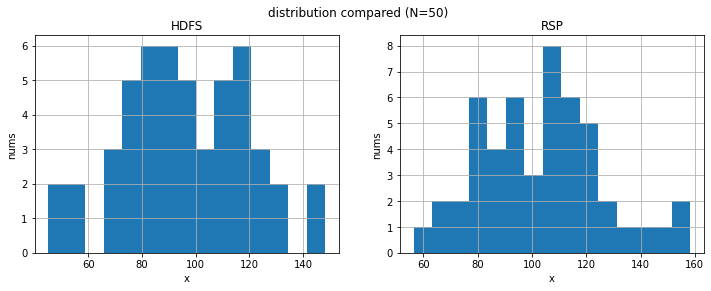

In [167]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('nums')
plt.title('HDFS')
_,_,_=plt.hist(HDFS[0][:],bins=15)
plt.subplot(1,2,2)
_,_,_=plt.hist(RSP[0][:],bins=15)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('nums')
plt.title('RSP')
plt.suptitle('distribution compared (N={})'.format(RSP.shape[0]))

## HDFS

Text(0.5, 1.0, 'HDFS')

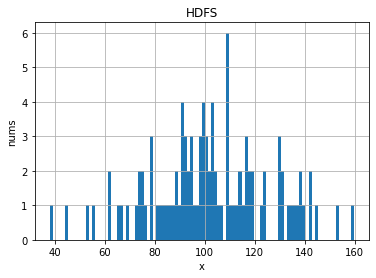

In [117]:
X=HDFS[0][:]
_,_,_=plt.hist(X,bins=100)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('nums')
plt.title('HDFS')

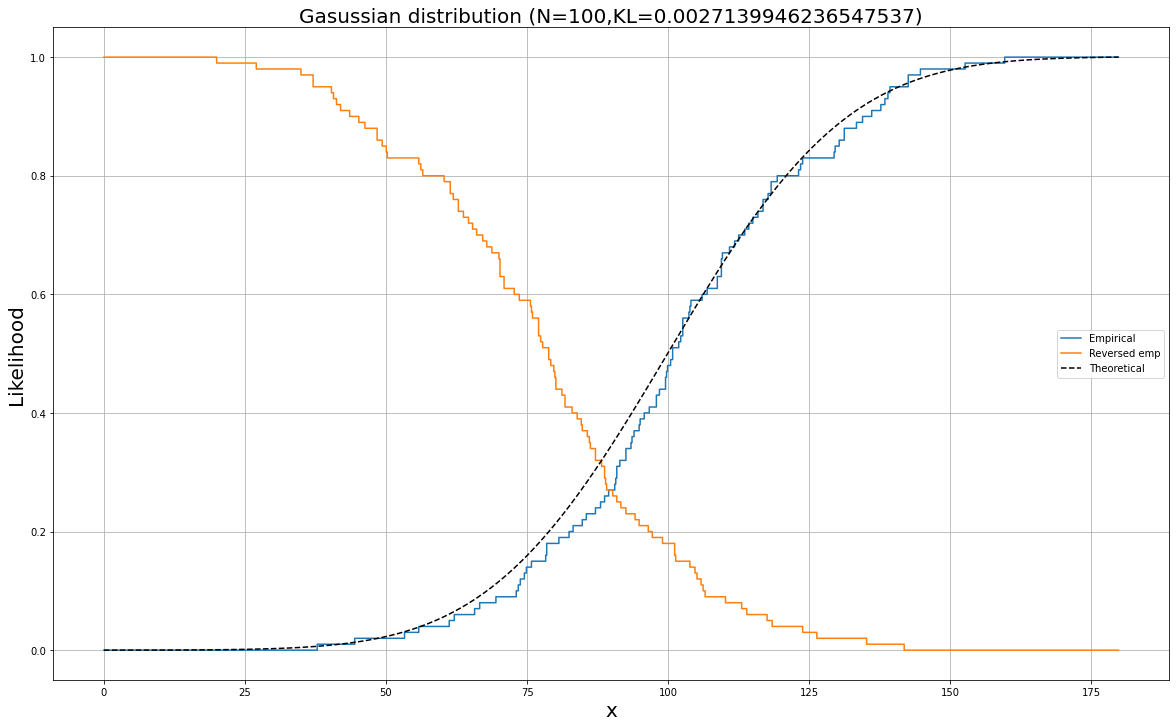

In [118]:
X=HDFS[0][:]

plt.figure(figsize=[20,12])
# plt.subplot(2,2,1)
plot_(X,N=100)
# # --------------------------------------------
# plt.subplot(2,2,2)
# plot_(N=1000)
# # --------------------------------------------
# plt.subplot(2,2,3)
# plot_(N=1000)
# # --------------------------------------------
# plt.subplot(2,2,4)
# plot_(N=1000)

# plt.suptitle('Gaussian distribution',fontsize=25)

## RSP

Text(0.5, 1.0, 'RSP')

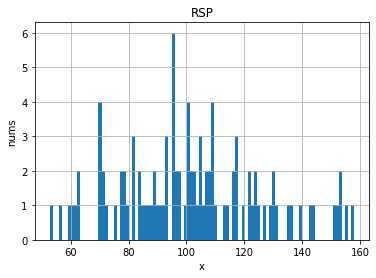

In [119]:
X=RSP[0][:]
_,_,_=plt.hist(X,bins=100)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('nums')
plt.title('RSP')

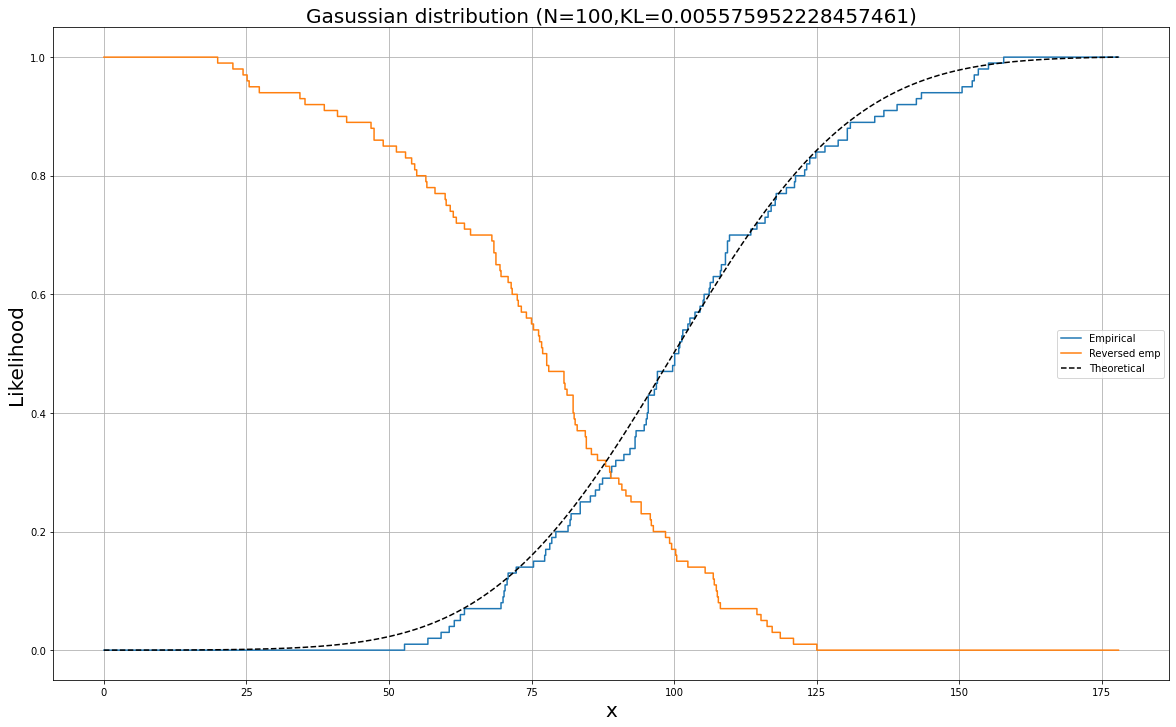

In [120]:
X=RSP[0][:]

plt.figure(figsize=[20,12])
# plt.subplot(2,2,1)
plot_(X,N=100)
# # --------------------------------------------
# plt.subplot(2,2,2)
# plot_(N=1000)
# # --------------------------------------------
# plt.subplot(2,2,3)
# plot_(N=1000)
# # --------------------------------------------
# plt.subplot(2,2,4)
# plot_(N=1000)

# plt.suptitle('Gaussian distribution',fontsize=25)